In [68]:
#Author: Renzo Fabrig
#CS 3650.01
#Assignment: Final Quantum Computing Project
#5-13-2020
#Problem Description - Create a program that runs on the IBM Quantum computer

In [69]:

    #I will be implementing the Deutsch Josza algorithm showing off the Hadamard gates and the 
        #utlization of superposition on quantum bits to "improve" the classical bit
    

In [70]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as mplt
%matplotlib inline

In [71]:
n = 13 #n for the bit length
#Split the probabilities for the function to be constant or variable
blackBoxType = np.random.randint(2)
blackBoxValue = np.random.randint(2)

In [72]:
# 0 for vlackBoxType is Constant
if blackBoxType == 0:
    
    print("Constant Function", blackBoxValue)
    
else:
    
    print("Variable Function")
    a = np.random.randint(1, 2**n)
    
#Setup registers for the quantum circuit
qr = QuantumRegister(n + 1)
cr = ClassicalRegister(n)

#Create the quantum circuit for the deutsch josza algorithm
circuit = QuantumCircuit(qr, cr)

#Apply the hadamard gate to all quantum bits to achieve superposition
for i in range(n):
    circuit.h(qr[i])
    
#bit flip the nth register
circuit.x(qr[n])
circuit.h(qr[n])

#Splits the circuit visually using a barrier
circuit.barrier()


if blackBoxType == 0:
    if blackBoxValue == 1:
        circuit.x(qr[n])
    else:
        circuit.i(qr[n])
else:
    for i in range(n):
        if(a & (1 << i)):
            circuit.cx(qr[i], qr[n])

#Splits the circuit visually using a barrier
circuit.barrier()

#Apply the hadamard gate to all quantum bits to achieve superposition
#    after iterating through the blackbox 
for i in range(n):
    circuit.h(qr[i])

#Splits the circuit visually using a barrier
circuit.barrier()

#Collapse the qubits to an actual value using the measure function
for i in range(n):
    circuit.measure(qr[i], cr[i])

Variable Function


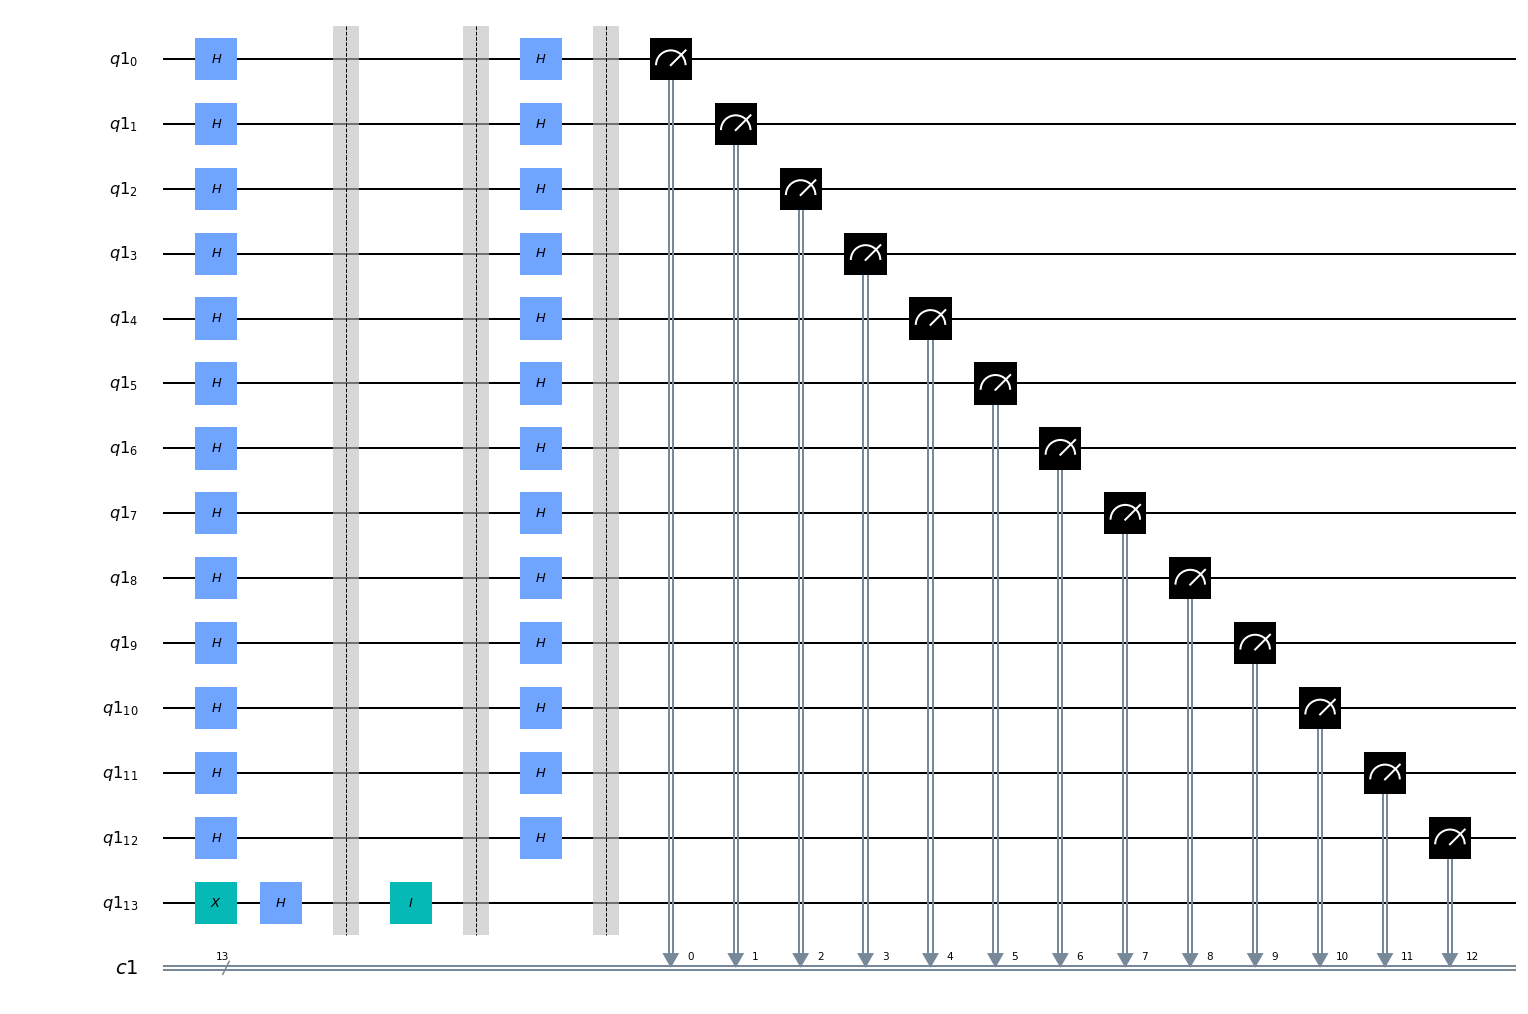

In [73]:
djCircuit.draw(output = 'mpl', scale = 1.0)

In [74]:
#Test circuit using qasm simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(djCircuit, backend = simulator, shots = 1000)
result = job.result()

In [75]:
from qiskit.tools.visualization import plot_histogram

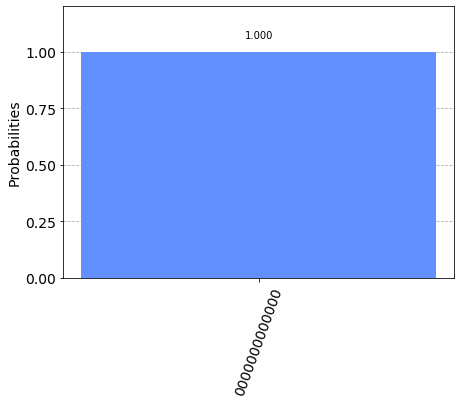

In [76]:
plot_histogram(result.get_counts())

In [77]:
from qiskit.compiler import transpile
from qiskit.tools.monitor import job_monitor

In [78]:
#Test circuit using IBM's quantum computer
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-05-13 18:34:00,702: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [79]:
provider = IBMQ.get_provider('ibm-q')

In [80]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [81]:
djCompiled = transpile(djCircuit, backend = qcomp, optimization_level = 1)

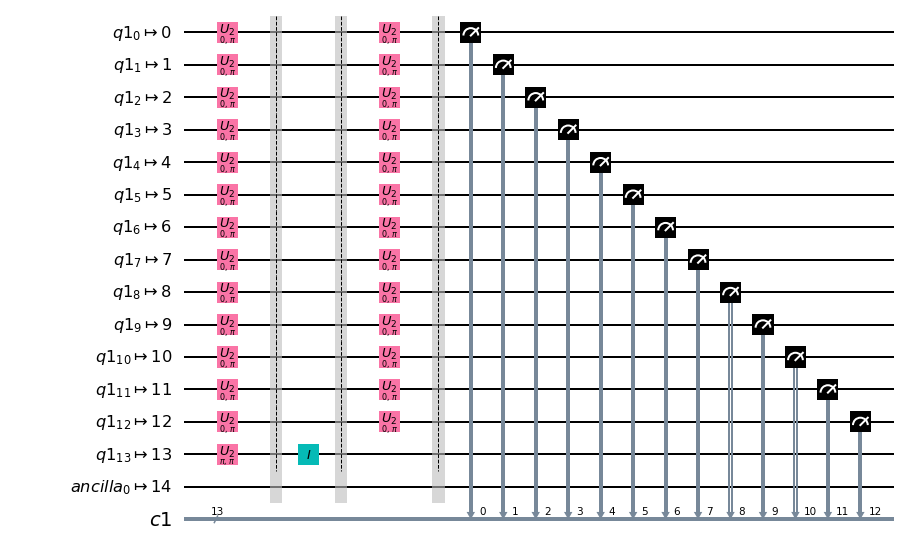

In [82]:
djCompiled.draw(output = 'mpl', scale = 0.5)

In [83]:
job = execute(djCompiled, backend = qcomp, shots = 1024)
job_monitor(job)

Job Status: job has successfully run


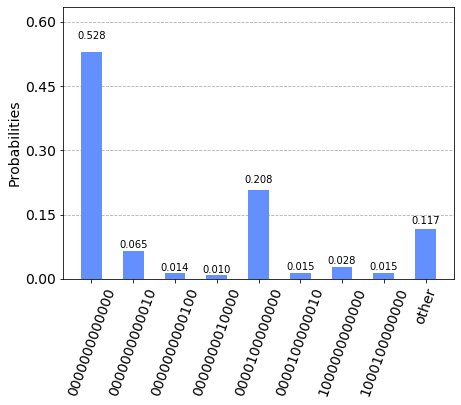

In [86]:
results = job.result()
answer = results.get_counts()

thresh = int(0.01 * 1000)
filteredAns = {k: v for k,v in answer.items() if v >= thresh}

removedCounts = np.sum([v for k,v in answer.items() if v < thresh])

filteredAns['other'] = removedCounts

plot_histogram(filteredAns)

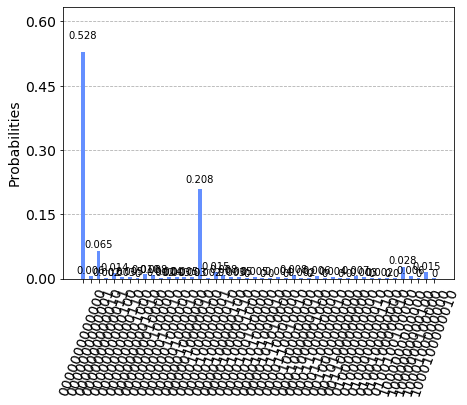

In [85]:
plot_histogram(answer)